# Setup & Load Data

In [2]:
from __future__ import unicode_literals
import os
import sys
# sys.path.append('../')
import datetime
import pandas as pd
import numpy as np
import datetime
import matplotlib as mpl
import matplotlib.pylab as plt
import matplotlib.dates as md
import matplotlib.dates as mdates
import random
import seaborn as sns
%matplotlib inline
from matplotlib import font_manager, rc
from vistools.utils import *
from pytz import timezone
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes, mark_inset, inset_axes

data_path = '../enertalk-dataset/'
overall_fontsize = 30
h_fmt = mdates.DateFormatter('%H:%M', tz = timezone('Asia/Seoul'))

fig_width = 8.9
golden_mean = (np.sqrt(5)-1.0)/2.0    # Aesthetic ratio
fig_height = fig_width*golden_mean # height in inches

duration_dict = {'fridge': ('2016-10-07 04:00:00', '2016-10-07 05:30:00'),
                'kimchi-fridge': ('2017-01-19 03:30:00', '2017-01-19 05:00:00'),
                'water-purifier': ('2016-12-23 01:30:00', '2016-12-23 05:00:00'),
                'TV': ('2016-11-23 03:20:40', '2016-11-23 06:20:40'),
                'washing-machine': ('2016-11-23 01:00:00', '2016-11-23 02:00:00'),
                'rice-cooker': ('2016-11-26 10:45:00', '2016-11-26 11:25:00')}

house_dict = {'fridge': '03',
           'kimchi-fridge': '01',
           'water-purifier': '00',
           'TV': '00',
           'washing-machine': '00',
            'rice-cooker': '00'
           }
# read data beforehand

df_dict = {}
for app in duration_dict.keys():
    psn = house_dict[app]
    duration = duration_dict[app]
    date_for_timestamp = duration[0][:10]
    psn_date = psn+'/'+date_for_timestamp.replace('-','')+'/'

    fridge_fname = [fname for fname in os.listdir(data_path+psn_date) if app in fname][0]
    df = pd.read_parquet(data_path+psn_date+fridge_fname)
    df['timestamp'] = pd.to_datetime(df['timestamp'], unit='ms')
    df = get_specific_duration(df, duration[0], duration[1])
    df_dict[app] = df


/home/ejlee/anaconda3/lib/python3.6/site-packages/pyarrow/pandas_compat.py:698: FutureWarning: .labels was deprecated in version 0.24.0. Use .codes instead.
  labels = getattr(columns, 'labels', None) or [
/home/ejlee/anaconda3/lib/python3.6/site-packages/pyarrow/pandas_compat.py:725: FutureWarning: the 'labels' keyword is deprecated, use 'codes' instead
  return pd.MultiIndex(levels=new_levels, labels=labels, names=columns.names)
/home/ejlee/anaconda3/lib/python3.6/site-packages/pyarrow/pandas_compat.py:742: FutureWarning: .labels was deprecated in version 0.24.0. Use .codes instead.
  labels, = index.labels


# Visualize Figure 5. Data snippets of six appliances

/home/ejlee/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


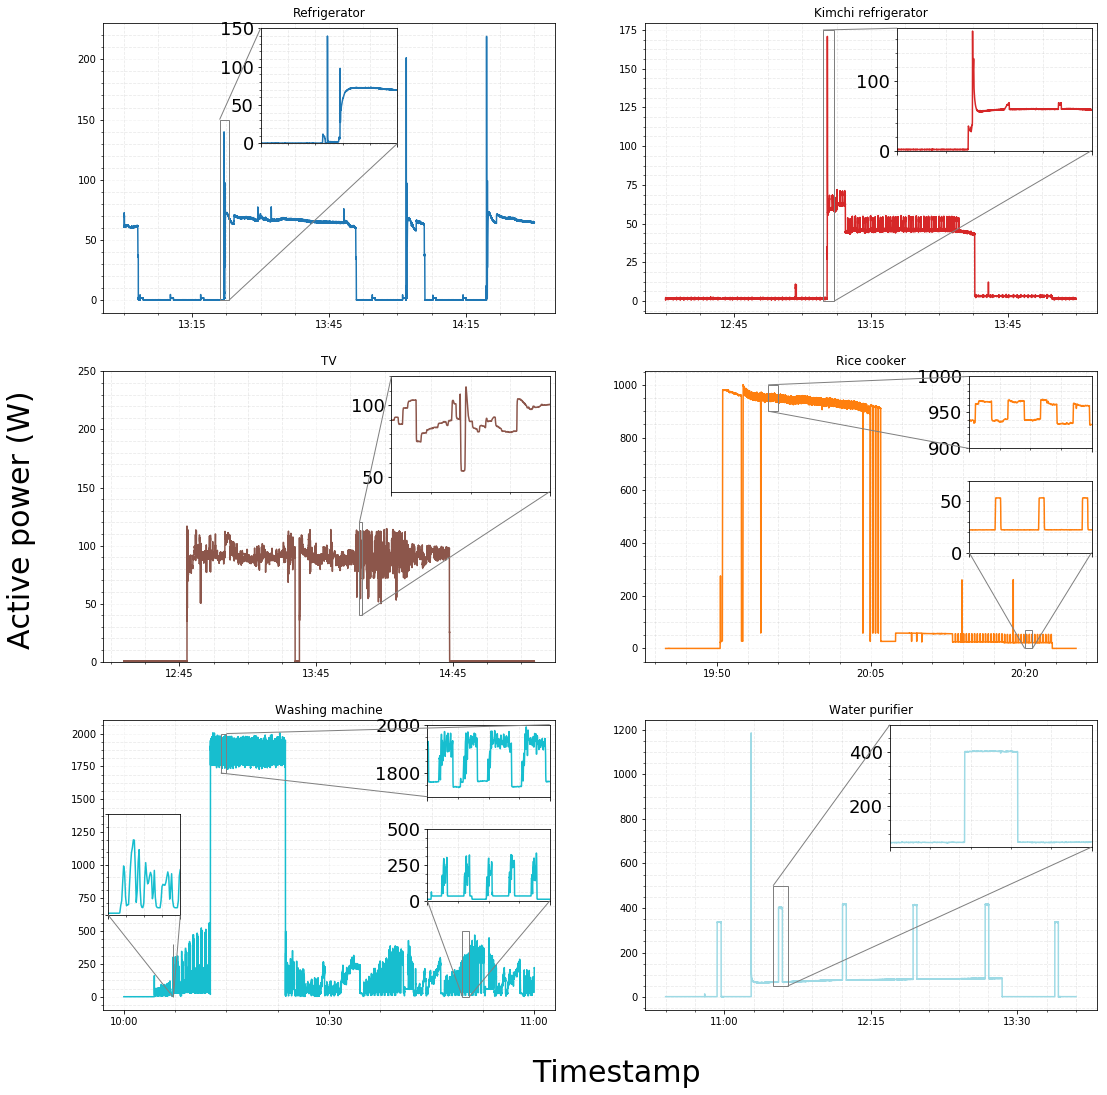

In [5]:

fig, axes = plt.subplots(3,2, sharex=False, sharey=False,
                             figsize = (fig_width*2, fig_height*3.3))
inaxes_labelsize = overall_fontsize*0.6
############## Fridge
## setup
app_name = 'fridge'
hours = mdates.MinuteLocator(interval = 15, tz = timezone('Asia/Seoul'))
app_color = 'b'


psn = house_dict[app_name]
df = df_dict[app_name]
duration = duration_dict[app_name]
date_for_timestamp = duration[0][:10]

# # ## draw plot
app_color = get_app_color(app_name)

ax = axes[0,0]
ax.plot(df['timestamp'], df['active_power'], color=app_color)
#ax.set_xlabel('Timestamp', fontsize = overall_fontsize)
# ax.set_ylabel('Active power (W)',  fontsize = overall_fontsize)
hours = mdates.MinuteLocator(interval = 30, tz = timezone('Asia/Seoul'))
h_fmt = mdates.DateFormatter('%H:%M', tz = timezone('Asia/Seoul'))
ax.xaxis.set_major_locator(hours)
ax.xaxis.set_major_formatter(h_fmt)
ax.grid(b=True, which='major', color='#999999', linestyle='--', alpha = 0.1)
ax.minorticks_on()
ax.grid(b=True, which='minor', color='#999999', linestyle='--', alpha=0.2)
ax.xaxis.set_major_locator(hours)
ax.xaxis.set_major_formatter(h_fmt)
ax.set_title(get_pretty_name(app_name))

year = int(date_for_timestamp[:4])
month = int(date_for_timestamp[5:7])
day = int(date_for_timestamp[8:10])
ax.set_xticks([datetime.datetime(year,month,day,4,15,0),
                  datetime.datetime(year,month,day,4,45,0),
                  datetime.datetime(year,month,day,5,15,0)])




axins = inset_axes(ax, width=1.9, height=1.6, loc=9)
axins.plot(df['timestamp'], df['active_power'], color=app_color)
x1, x2, y1, y2 = date_for_timestamp +' 04:21:00', date_for_timestamp + ' 04:23:00', 0, 150.0
axins.axis([x1, x2, y1, y2])
# plt.xticks(visible=False)
axins.set_xticklabels([])
mark_inset(ax, axins, loc1=2, loc2=4, fc="none", ec="0.5", zorder=10)
hours = mdates.MinuteLocator(interval = 30, tz = timezone('Asia/Seoul'))
h_fmt = mdates.DateFormatter('%H:%M', tz = timezone('Asia/Seoul'))
axins.xaxis.set_major_locator(hours)
axins.xaxis.set_major_formatter(h_fmt)
axins.grid(b=True, which='major', color='#999999', linestyle='--', alpha = 0.1)
axins.minorticks_on()
axins.grid(b=True, which='minor', color='#999999', linestyle='--', alpha=0.2)
axins.set_xticklabels([])
axins.yaxis.set_tick_params(labelsize=inaxes_labelsize)

# ###### Kimchi Fridge

# ## setup
app_name = 'kimchi-fridge'
psn = house_dict[app_name]
df = df_dict[app_name]
duration = duration_dict[app_name]
date_for_timestamp = duration[0][:10]

# # ## draw plot
app_color = get_app_color(app_name)

ax = axes[0,1]
ax.plot(df['timestamp'], df['active_power'], color=app_color)
#ax.set_xlabel('Timestamp', fontsize = overall_fontsize)
#ax.set_ylabel('Active power (W)',  fontsize = overall_fontsize)
hours = mdates.MinuteLocator(interval = 30, tz = timezone('Asia/Seoul'))
h_fmt = mdates.DateFormatter('%H:%M', tz = timezone('Asia/Seoul'))
ax.xaxis.set_major_locator(hours)
ax.xaxis.set_major_formatter(h_fmt)
ax.grid(b=True, which='major', color='#999999', linestyle='--', alpha = 0.1)
ax.minorticks_on()
ax.grid(b=True, which='minor', color='#999999', linestyle='--', alpha=0.2)
ax.xaxis.set_major_locator(hours)
ax.xaxis.set_major_formatter(h_fmt)

year = int(date_for_timestamp[:4])
month = int(date_for_timestamp[5:7])
day = int(date_for_timestamp[8:10])
ax.set_xticks([datetime.datetime(year,month,day,3,45,0),
                  datetime.datetime(year,month,day,4,15,0),
                  datetime.datetime(year,month,day,4,45,0)])
ax.set_title(get_pretty_name(app_name))

axins = inset_axes(ax, width=2.7, height=1.7, loc=1)
axins.plot(df['timestamp'], df['active_power'], color=app_color)
x1, x2, y1, y2 = date_for_timestamp +' 04:04:30', date_for_timestamp + ' 04:07:00', 0, 175.0
axins.axis([x1, x2, y1, y2])

hours = mdates.MinuteLocator(interval = 30, tz = timezone('Asia/Seoul'))
h_fmt = mdates.DateFormatter('%H:%M', tz = timezone('Asia/Seoul'))
axins.xaxis.set_major_locator(hours)
axins.xaxis.set_major_formatter(h_fmt)
axins.grid(b=True, which='major', color='#999999', linestyle='--', alpha = 0.1)
axins.minorticks_on()
axins.grid(b=True, which='minor', color='#999999', linestyle='--', alpha=0.2)
mark_inset(ax, axins, loc1=2, loc2=4, fc="none", ec="0.5", zorder=10)
axins.set_xticklabels([])
axins.yaxis.set_tick_params(labelsize=inaxes_labelsize)

############## TV

## setup
app_name = 'TV'
psn = house_dict[app_name]
df = df_dict[app_name]
duration = duration_dict[app_name]
date_for_timestamp = duration[0][:10]

# # ## draw plot
app_color = get_app_color(app_name)

ax = axes[1,0]
ax.plot(df['timestamp'], df['active_power'], color=app_color)
#ax.set_xlabel('Timestamp', fontsize = overall_fontsize)
# ax.set_ylabel('Active power (W)',  fontsize = overall_fontsize)
hours = mdates.MinuteLocator(interval = 30, tz = timezone('Asia/Seoul'))
h_fmt = mdates.DateFormatter('%H:%M', tz = timezone('Asia/Seoul'))
ax.xaxis.set_major_locator(hours)
ax.xaxis.set_major_formatter(h_fmt)
ax.grid(b=True, which='major', color='#999999', linestyle='--', alpha = 0.1)
ax.minorticks_on()
ax.grid(b=True, which='minor', color='#999999', linestyle='--', alpha=0.2)
ax.xaxis.set_major_locator(hours)
ax.xaxis.set_major_formatter(h_fmt)
ax.set_title(get_pretty_name(app_name))
ax.set_ylim([0,250])

year = int(date_for_timestamp[:4])
month = int(date_for_timestamp[5:7])
day = int(date_for_timestamp[8:10])
ax.set_xticks([datetime.datetime(year,month,day,3,45,0),
                  datetime.datetime(year,month,day,4,45,0),
                  datetime.datetime(year,month,day,5,45,0)])




axins = inset_axes(ax, width=2.2, height=1.6, loc=1)
axins.plot(df['timestamp'], df['active_power'], color=app_color)
x1, x2, y1, y2 = date_for_timestamp +' 05:04:00', date_for_timestamp + ' 05:05:00', 40, 120
axins.axis([x1, x2, y1, y2])
# plt.xticks(visible=False)
axins.set_xticklabels([])
mark_inset(ax, axins, loc1=2, loc2=4, fc="none", ec="0.5", zorder=10)
hours = mdates.MinuteLocator(interval = 30, tz = timezone('Asia/Seoul'))
h_fmt = mdates.DateFormatter('%H:%M', tz = timezone('Asia/Seoul'))
axins.xaxis.set_major_locator(hours)
axins.xaxis.set_major_formatter(h_fmt)
axins.grid(b=True, which='major', color='#999999', linestyle='--', alpha = 0.1)
axins.minorticks_on()
axins.grid(b=True, which='minor', color='#999999', linestyle='--', alpha=0.2)
axins.set_xticklabels([])
axins.yaxis.set_tick_params(labelsize=inaxes_labelsize)

############## Rice Cooker

## setup
app_name = 'rice-cooker'
psn = house_dict[app_name]
df = df_dict[app_name]
duration = duration_dict[app_name]
date_for_timestamp = duration[0][:10]

# # ## draw plot
app_color = get_app_color(app_name)

ax = axes[1,1]
ax.plot(df['timestamp'], df['active_power'], color=app_color)
#ax.set_xlabel('Timestamp', fontsize = overall_fontsize)
#ax.set_ylabel('Active power (W)',  fontsize = overall_fontsize)
hours = mdates.MinuteLocator(interval = 30, tz = timezone('Asia/Seoul'))
h_fmt = mdates.DateFormatter('%H:%M', tz = timezone('Asia/Seoul'))
ax.xaxis.set_major_locator(hours)
ax.xaxis.set_major_formatter(h_fmt)
ax.grid(b=True, which='major', color='#999999', linestyle='--', alpha = 0.1)
ax.minorticks_on()
ax.grid(b=True, which='minor', color='#999999', linestyle='--', alpha=0.2)
ax.xaxis.set_major_locator(hours)
ax.xaxis.set_major_formatter(h_fmt)
ax.set_title(get_pretty_name(app_name))

year = int(date_for_timestamp[:4])
month = int(date_for_timestamp[5:7])
day = int(date_for_timestamp[8:10])
ax.set_xticks([datetime.datetime(year,month,day,10,50,0),
                  datetime.datetime(year,month,day,11,5,0),
                  datetime.datetime(year,month,day,11,20,0)])




# cooking
axins = inset_axes(ax, width=1.7, height=1.0, loc=1)
axins.plot(df['timestamp'], df['active_power'], color=app_color)
x1, x2, y1, y2 = date_for_timestamp +' 10:55:00', date_for_timestamp + ' 10:56:00', 900, 1000
axins.axis([x1, x2, y1, y2])
plt.xticks(visible=False)
mark_inset(ax, axins, loc1=2, loc2=3, fc="none", ec="0.5", zorder=10)
axins.set_xticklabels([])


hours = mdates.MinuteLocator(interval = 30, tz = timezone('Asia/Seoul'))
h_fmt = mdates.DateFormatter('%H:%M', tz = timezone('Asia/Seoul'))
axins.xaxis.set_major_locator(hours)
axins.xaxis.set_major_formatter(h_fmt)
axins.grid(b=True, which='major', color='#999999', linestyle='--', alpha = 0.1)
axins.minorticks_on()
axins.grid(b=True, which='minor', color='#999999', linestyle='--', alpha=0.2)
axins.set_xticklabels([])
axins.yaxis.set_tick_params(labelsize=inaxes_labelsize)

# keep warm?
axins = inset_axes(ax, width=1.7, height=1.0, loc=7)
axins.plot(df['timestamp'], df['active_power'], color=app_color)
x1, x2, y1, y2 = date_for_timestamp +' 11:20:00', date_for_timestamp + ' 11:20:45', 0, 70
axins.axis([x1, x2, y1, y2])
plt.xticks(visible=False)
mark_inset(ax, axins, loc1=3, loc2=4, fc="none", ec="0.5", zorder=10)
axins.set_xticklabels([])


hours = mdates.MinuteLocator(interval = 30, tz = timezone('Asia/Seoul'))
h_fmt = mdates.DateFormatter('%H:%M', tz = timezone('Asia/Seoul'))
axins.xaxis.set_major_locator(hours)
axins.xaxis.set_major_formatter(h_fmt)
axins.grid(b=True, which='major', color='#999999', linestyle='--', alpha = 0.1)
axins.minorticks_on()
axins.grid(b=True, which='minor', color='#999999', linestyle='--', alpha=0.2)
axins.set_xticklabels([])
axins.yaxis.set_tick_params(labelsize=inaxes_labelsize)

############## Washing machine

## setup
app_name = 'washing-machine'
psn = house_dict[app_name]
df = df_dict[app_name]
duration = duration_dict[app_name]
date_for_timestamp = duration[0][:10]

# # ## draw plot
app_color = get_app_color(app_name)

ax = axes[2,0]
ax.plot(df['timestamp'], df['active_power'], color=app_color)
# ax.set_xlabel('Timestamp', fontsize = overall_fontsize)
# ax.set_ylabel('Active power (W)',  fontsize = overall_fontsize)
hours = mdates.MinuteLocator(interval = 30, tz = timezone('Asia/Seoul'))
h_fmt = mdates.DateFormatter('%H:%M', tz = timezone('Asia/Seoul'))
ax.xaxis.set_major_locator(hours)
ax.xaxis.set_major_formatter(h_fmt)
ax.grid(b=True, which='major', color='#999999', linestyle='--', alpha = 0.1)
ax.minorticks_on()
ax.grid(b=True, which='minor', color='#999999', linestyle='--', alpha=0.2)
ax.xaxis.set_major_locator(hours)
ax.xaxis.set_major_formatter(h_fmt)
ax.set_title(get_pretty_name(app_name))

year = int(date_for_timestamp[:4])
month = int(date_for_timestamp[5:7])
day = int(date_for_timestamp[8:10])
ax.set_xticks([datetime.datetime(year,month,day,1,0,0),
                  datetime.datetime(year,month,day,1,30,0),
                  datetime.datetime(year,month,day,2,0,0)])




# pre
axins = inset_axes(ax, width=1.0, height=1.4, loc=6)
axins.plot(df['timestamp'], df['active_power'], color=app_color)
x1, x2, y1, y2 = date_for_timestamp +' 01:07:10', date_for_timestamp + ' 01:07:15', 0, 400
axins.axis([x1, x2, y1, y2])
axins.set_xticklabels([])
axins.set_yticklabels([])
mark_inset(ax, axins, loc1=4, loc2=3, fc="none", ec="0.5", zorder=10)
hours = mdates.MinuteLocator(interval = 30, tz = timezone('Asia/Seoul'))
h_fmt = mdates.DateFormatter('%H:%M', tz = timezone('Asia/Seoul'))
axins.xaxis.set_major_locator(hours)
axins.xaxis.set_major_formatter(h_fmt)
axins.grid(b=True, which='major', color='#999999', linestyle='--', alpha = 0.1)
axins.minorticks_on()
axins.grid(b=True, which='minor', color='#999999', linestyle='--', alpha=0.2)
axins.set_xticklabels([])
axins.yaxis.set_tick_params(labelsize=inaxes_labelsize)

# middle
axins = inset_axes(ax, width=1.7, height=1.0, loc=1)
axins.plot(df['timestamp'], df['active_power'], color=app_color)
x1, x2, y1, y2 = date_for_timestamp +' 01:14:10', date_for_timestamp + ' 01:15:00', 1700, 2000 
axins.axis([x1, x2, y1, y2])
axins.set_xticklabels([])
mark_inset(ax, axins, loc1=1, loc2=3, fc="none", ec="0.5", zorder=10)
hours = mdates.MinuteLocator(interval = 30, tz = timezone('Asia/Seoul'))
h_fmt = mdates.DateFormatter('%H:%M', tz = timezone('Asia/Seoul'))
axins.xaxis.set_major_locator(hours)
axins.xaxis.set_major_formatter(h_fmt)
axins.grid(b=True, which='major', color='#999999', linestyle='--', alpha = 0.1)
axins.minorticks_on()
axins.grid(b=True, which='minor', color='#999999', linestyle='--', alpha=0.2)
axins.set_xticklabels([])
axins.yaxis.set_tick_params(labelsize=inaxes_labelsize)

# post
axins = inset_axes(ax, width=1.7, height=1.0, loc=7)
axins.plot(df['timestamp'], df['active_power'], color=app_color)
x1, x2, y1, y2 = date_for_timestamp +' 01:49:30', date_for_timestamp + ' 01:50:30', 0, 500
axins.axis([x1, x2, y1, y2])
axins.set_xticklabels([])
mark_inset(ax, axins, loc1=3, loc2=4, fc="none", ec="0.5", zorder=10)
hours = mdates.MinuteLocator(interval = 30, tz = timezone('Asia/Seoul'))
h_fmt = mdates.DateFormatter('%H:%M', tz = timezone('Asia/Seoul'))
axins.xaxis.set_major_locator(hours)
axins.xaxis.set_major_formatter(h_fmt)
axins.grid(b=True, which='major', color='#999999', linestyle='--', alpha = 0.1)
axins.minorticks_on()
axins.grid(b=True, which='minor', color='#999999', linestyle='--', alpha=0.2)
axins.set_xticklabels([])
axins.yaxis.set_tick_params(labelsize=inaxes_labelsize)

############## Water purifier

## setup
app_name = 'water-purifier'
psn = house_dict[app_name]
df = df_dict[app_name]
duration = duration_dict[app_name]
date_for_timestamp = duration[0][:10]

# # ## draw plot
app_color = get_app_color(app_name)

ax = axes[2,1]
ax.plot(df['timestamp'], df['active_power'], color=app_color)
# ax.set_xlabel('Timestamp', fontsize = overall_fontsize)
#ax.set_ylabel('Active power (W)',  fontsize = overall_fontsize)
hours = mdates.MinuteLocator(interval = 30, tz = timezone('Asia/Seoul'))
h_fmt = mdates.DateFormatter('%H:%M', tz = timezone('Asia/Seoul'))
ax.xaxis.set_major_locator(hours)
ax.xaxis.set_major_formatter(h_fmt)
ax.grid(b=True, which='major', color='#999999', linestyle='--', alpha = 0.1)
ax.minorticks_on()
ax.grid(b=True, which='minor', color='#999999', linestyle='--', alpha=0.2)
ax.xaxis.set_major_locator(hours)
ax.xaxis.set_major_formatter(h_fmt)
ax.set_title(get_pretty_name(app_name))

year = int(date_for_timestamp[:4])
month = int(date_for_timestamp[5:7])
day = int(date_for_timestamp[8:10])
ax.set_xticks([datetime.datetime(year,month,day,2,0,0),
                  datetime.datetime(year,month,day,3,15,0),
                  datetime.datetime(year,month,day,4,30,0)])



axins = inset_axes(ax, width=2.8, height=1.7, loc=1)
axins.plot(df['timestamp'], df['active_power'], color=app_color)
x1, x2, y1, y2 = date_for_timestamp +' 02:25:00', date_for_timestamp + ' 02:32:30', 50, 500
axins.axis([x1, x2, y1, y2])
plt.xticks(visible=False)
mark_inset(ax, axins, loc1=2, loc2=4, fc="none", ec="0.5", zorder=10)
axins.set_xticklabels([])
hours = mdates.MinuteLocator(interval = 30, tz = timezone('Asia/Seoul'))
h_fmt = mdates.DateFormatter('%H:%M', tz = timezone('Asia/Seoul'))
axins.xaxis.set_major_locator(hours)
axins.xaxis.set_major_formatter(h_fmt)
axins.grid(b=True, which='major', color='#999999', linestyle='--', alpha = 0.1)
axins.minorticks_on()
axins.grid(b=True, which='minor', color='#999999', linestyle='--', alpha=0.2)
axins.set_xticklabels([])
axins.yaxis.set_tick_params(labelsize=inaxes_labelsize)
fig.text(0.05, 0.5, 'Active power (W)', va='center', rotation='vertical',  fontsize=overall_fontsize)
fig.text(0.525, 0.07, 'Timestamp', ha='center', fontsize=overall_fontsize)

fig.show()